<a href="https://colab.research.google.com/github/NykPol/dw_matrix_road_sign/blob/master/day4_data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from skimage import color,exposure
import numpy as np
import os
import datetime

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import accuracy_score

%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [2]:
cd '/content/drive/My Drive/Colab Notebooks/matrix/matrix_three/dw_matrix_road_sign'

/content/drive/My Drive/Colab Notebooks/matrix/matrix_three/dw_matrix_road_sign


In [3]:
ls data

signnames.csv  test.p  train.p


In [0]:
train = pd.read_pickle('data/train.p')
test = pd.read_pickle('data/test.p')

X_train, y_train = train['features'], train['labels']
X_test, y_test = test ['features'], test ['labels']

df = pd.read_csv('data/signnames.csv')
lables_dict = df.to_dict()['b']

In [5]:
y_train 

array([41, 41, 41, ..., 25, 25, 25], dtype=uint8)

In [6]:
len(np.unique(y_train))

43

In [7]:
to_categorical(y_train)[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [8]:
to_categorical(y_train)[-1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [9]:
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42], dtype=uint8)

In [0]:
if y_train.ndim == 1: y_train = to_categorical(y_train)
if y_test.ndim == 1: y_test = to_categorical(y_test)

In [11]:
y_train.shape

(34799, 43)

In [12]:
X_train.shape

(34799, 32, 32, 3)

In [0]:
input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

In [14]:
model = Sequential([
  Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=input_shape),
  Flatten(),
  Dense(num_classes, activation='softmax'),




])
model.summary()
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='Adam')
model.fit(X_train,y_train)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
flatten (Flatten)            (None, 57600)             0         
_________________________________________________________________
dense (Dense)                (None, 43)                2476843   
Total params: 2,478,635
Trainable params: 2,478,635
Non-trainable params: 0
_________________________________________________________________
1088/1088 [==============================] - 4s 4ms/step - loss: 8.9499 - accuracy: 0.7818


In [0]:
def get_cnn_v1(input_shape,num_classes):
  return Sequential([
  Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=input_shape),
  Flatten(),
  Dense(num_classes, activation='softmax'),
])
  
def train_model(model,X_train,y_train,params_fit={}):
  model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='Adam')

  logdir=os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  tensorboard_callbacks = tf.keras.callbacks.TensorBoard(logdir,histogram_freq=1)
  model.fit(
      X_train
      ,y_train
      ,batch_size=params_fit.get('batch_size',128)
      ,epochs = params_fit.get('epochs',5)
      ,verbose = params_fit.get('verbose',1)
      ,validation_data=params_fit.get('validation_data',(X_train,y_train))
      ,callbacks = [tensorboard_callbacks]
      )
  return model

Epoch 1/5
272/272 [==============================] - 3s 12ms/step - loss: 20.8859 - accuracy: 0.7565 - val_loss: 0.1972 - val_accuracy: 0.9529
Epoch 2/5
272/272 [==============================] - 3s 11ms/step - loss: 0.2176 - accuracy: 0.9508 - val_loss: 0.1870 - val_accuracy: 0.9584
Epoch 3/5
272/272 [==============================] - 3s 10ms/step - loss: 0.1457 - accuracy: 0.9664 - val_loss: 0.1050 - val_accuracy: 0.9759
Epoch 4/5
272/272 [==============================] - 3s 10ms/step - loss: 0.0984 - accuracy: 0.9770 - val_loss: 0.0859 - val_accuracy: 0.9818
Epoch 5/5
272/272 [==============================] - 3s 10ms/step - loss: 0.1023 - accuracy: 0.9763 - val_loss: 0.0935 - val_accuracy: 0.9781


'Speed limit (30km/h)'

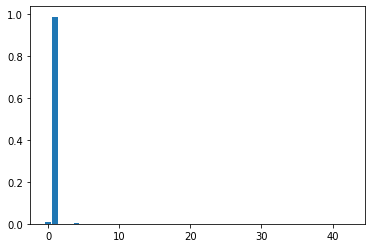

In [42]:
y_pred_probs[400]

plt.bar(range(43),y_pred_probs[400])

lables_dict[np.argmax(y_pred_probs[400])]

In [0]:
def predict(model_trained, X_test, y_test, scoring=accuracy_score):
  y_test_norm = np.argmax(y_test,axis=1)

  y_pred_probs = model_trained.predict(X_test)
  y_pred = np.argmax(y_pred_probs,axis=1)

  return scoring(y_test_norm,y_pred)

In [46]:
predict(model_trained, X_test, y_test)

0.8111111111111111

In [47]:
model = get_cnn_v1(input_shape,num_classes)
model_trained = train_model(model, X_train,y_train)

predict(model_trained, X_test, y_test)

Epoch 1/5
272/272 [==============================] - 3s 11ms/step - loss: 34.4550 - accuracy: 0.7618 - val_loss: 0.2260 - val_accuracy: 0.9450
Epoch 2/5
272/272 [==============================] - 3s 11ms/step - loss: 0.2043 - accuracy: 0.9509 - val_loss: 0.1249 - val_accuracy: 0.9701
Epoch 3/5
272/272 [==============================] - 3s 11ms/step - loss: 0.1369 - accuracy: 0.9678 - val_loss: 0.1520 - val_accuracy: 0.9669
Epoch 4/5
272/272 [==============================] - 3s 11ms/step - loss: 0.1297 - accuracy: 0.9705 - val_loss: 0.0694 - val_accuracy: 0.9830
Epoch 5/5
272/272 [==============================] - 3s 11ms/step - loss: 0.0884 - accuracy: 0.9802 - val_loss: 0.0732 - val_accuracy: 0.9843


0.8317460317460318

In [49]:
def get_cnn_v2(input_shape,num_classes):
  return Sequential([
  Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
  MaxPool2D(),
  Dropout(0.5),

  Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
  MaxPool2D(),
  Dropout(0.3),

  Flatten(),

  Dense(1024, activation='relu'),
  Dropout(0.5),

  Dense(num_classes, activation='softmax'),
])
  
get_cnn_v2(input_shape,num_classes).summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 2304)             

In [50]:
model = get_cnn_v2(input_shape,num_classes)
params_fit = {
    'epochs':25
}
model_trained = train_model(model, X_train,y_train,params_fit)

predict(model_trained, X_test, y_test)

Epoch 1/25
272/272 [==============================] - 3s 12ms/step - loss: 8.5256 - accuracy: 0.0923 - val_loss: 3.2171 - val_accuracy: 0.1297
Epoch 2/25
272/272 [==============================] - 3s 11ms/step - loss: 3.1022 - accuracy: 0.1494 - val_loss: 2.9904 - val_accuracy: 0.1758
Epoch 3/25
272/272 [==============================] - 3s 11ms/step - loss: 2.9356 - accuracy: 0.1964 - val_loss: 2.7058 - val_accuracy: 0.2722
Epoch 4/25
272/272 [==============================] - 3s 11ms/step - loss: 2.3477 - accuracy: 0.3401 - val_loss: 1.6105 - val_accuracy: 0.5549
Epoch 5/25
272/272 [==============================] - 3s 11ms/step - loss: 1.5558 - accuracy: 0.5276 - val_loss: 0.8308 - val_accuracy: 0.7875
Epoch 6/25
272/272 [==============================] - 3s 11ms/step - loss: 1.0639 - accuracy: 0.6692 - val_loss: 0.5411 - val_accuracy: 0.8693
Epoch 7/25
272/272 [==============================] - 3s 11ms/step - loss: 0.7436 - accuracy: 0.7658 - val_loss: 0.2927 - val_accuracy: 0.9309

0.9444444444444444

In [51]:
def train_and_predict(model):
  model_trained = train_model(model, X_train,y_train,params_fit)
  return predict(model_trained, X_test, y_test)  

Epoch 1/25
272/272 [==============================] - 3s 12ms/step - loss: 37.2182 - accuracy: 0.7127 - val_loss: 0.2865 - val_accuracy: 0.9323
Epoch 2/25
272/272 [==============================] - 3s 11ms/step - loss: 0.2628 - accuracy: 0.9397 - val_loss: 0.1498 - val_accuracy: 0.9610
Epoch 3/25
272/272 [==============================] - 3s 11ms/step - loss: 0.1640 - accuracy: 0.9616 - val_loss: 0.1917 - val_accuracy: 0.9505
Epoch 4/25
272/272 [==============================] - 3s 11ms/step - loss: 0.1155 - accuracy: 0.9710 - val_loss: 0.0759 - val_accuracy: 0.9831
Epoch 5/25
272/272 [==============================] - 3s 11ms/step - loss: 0.1154 - accuracy: 0.9733 - val_loss: 0.1561 - val_accuracy: 0.9677
Epoch 6/25
272/272 [==============================] - 3s 11ms/step - loss: 0.0994 - accuracy: 0.9764 - val_loss: 0.0996 - val_accuracy: 0.9765
Epoch 7/25
272/272 [==============================] - 3s 11ms/step - loss: 0.0951 - accuracy: 0.9784 - val_loss: 0.0503 - val_accuracy: 0.987

0.864172335600907

In [0]:
def get_cnn_v3(input_shape,num_classes):
  return Sequential([
  Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
  MaxPool2D(),

  Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
  MaxPool2D(),


  Flatten(),

  Dense(1024,activation='relu'),
  Dropout(0.3),
  Dense(num_classes, activation='softmax'),
])
  
def train_model(model,X_train,y_train,params_fit={}):
  model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='Adam')

  logdir=os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  tensorboard_callbacks = tf.keras.callbacks.TensorBoard(logdir,histogram_freq=1)
  model.fit(
      X_train
      ,y_train
      ,batch_size=params_fit.get('batch_size',128)
      ,epochs = params_fit.get('epochs',5)
      ,verbose = params_fit.get('verbose',1)
      ,validation_data=params_fit.get('validation_data',(X_train,y_train))
      ,callbacks = [tensorboard_callbacks]
      )
  return model

In [56]:
params_fit = {
    'epochs':5
}
train_and_predict(get_cnn_v3(input_shape,num_classes))

Epoch 1/5
272/272 [==============================] - 3s 11ms/step - loss: 2.0812 - accuracy: 0.7761 - val_loss: 0.1310 - val_accuracy: 0.9683
Epoch 2/5
272/272 [==============================] - 3s 11ms/step - loss: 0.1433 - accuracy: 0.9608 - val_loss: 0.0602 - val_accuracy: 0.9839
Epoch 3/5
272/272 [==============================] - 3s 10ms/step - loss: 0.0844 - accuracy: 0.9772 - val_loss: 0.0493 - val_accuracy: 0.9872
Epoch 4/5
272/272 [==============================] - 3s 11ms/step - loss: 0.0558 - accuracy: 0.9843 - val_loss: 0.0215 - val_accuracy: 0.9956
Epoch 5/5
272/272 [==============================] - 3s 11ms/step - loss: 0.0522 - accuracy: 0.9866 - val_loss: 0.0337 - val_accuracy: 0.9921


0.926984126984127

In [0]:
def get_cnn_v4(input_shape,num_classes):
  return Sequential([
  Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
  Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
  MaxPool2D(),

  Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
  Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
  MaxPool2D(),


  Flatten(),

  Dense(1024,activation='relu'),
  Dropout(0.3),
  Dense(num_classes, activation='softmax'),
])
  
def train_model(model,X_train,y_train,params_fit={}):
  model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='Adam')

  logdir=os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  tensorboard_callbacks = tf.keras.callbacks.TensorBoard(logdir,histogram_freq=1)
  model.fit(
      X_train
      ,y_train
      ,batch_size=params_fit.get('batch_size',128)
      ,epochs = params_fit.get('epochs',5)
      ,verbose = params_fit.get('verbose',1)
      ,validation_data=params_fit.get('validation_data',(X_train,y_train))
      ,callbacks = [tensorboard_callbacks]
      )
  return model

In [58]:
params_fit = {
    'epochs':5
}
train_and_predict(get_cnn_v4(input_shape,num_classes))

Epoch 1/5
272/272 [==============================] - 4s 14ms/step - loss: 1.1762 - accuracy: 0.7703 - val_loss: 0.1195 - val_accuracy: 0.9742
Epoch 2/5
272/272 [==============================] - 4s 13ms/step - loss: 0.1300 - accuracy: 0.9689 - val_loss: 0.0709 - val_accuracy: 0.9838
Epoch 3/5
272/272 [==============================] - 4s 13ms/step - loss: 0.0680 - accuracy: 0.9835 - val_loss: 0.0462 - val_accuracy: 0.9884
Epoch 4/5
272/272 [==============================] - 4s 13ms/step - loss: 0.0541 - accuracy: 0.9864 - val_loss: 0.0456 - val_accuracy: 0.9886
Epoch 5/5
272/272 [==============================] - 4s 13ms/step - loss: 0.0495 - accuracy: 0.9865 - val_loss: 0.0253 - val_accuracy: 0.9937


0.9510204081632653

In [0]:
def get_cnn_v5(input_shape,num_classes):
  return Sequential([
  Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
  Conv2D(filters=32, kernel_size=(3,3), activation='relu',padding='same'),
  MaxPool2D(),
  Dropout(0.3),

  Conv2D(filters=64, kernel_size=(3,3), activation='relu',padding='same'),
  Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
  MaxPool2D(),
  Dropout(0.3),

  Conv2D(filters=64, kernel_size=(3,3), activation='relu',padding='same'),
  Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
  MaxPool2D(),
  Dropout(0.3),


  Flatten(),

  Dense(1024,activation='relu'),
  Dropout(0.3),
  Dense(num_classes, activation='softmax'),
])
  
def train_model(model,X_train,y_train,params_fit={}):
  model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='Adam')

  logdir=os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  tensorboard_callbacks = tf.keras.callbacks.TensorBoard(logdir,histogram_freq=1)
  model.fit(
      X_train
      ,y_train
      ,batch_size=params_fit.get('batch_size',128)
      ,epochs = params_fit.get('epochs',5)
      ,verbose = params_fit.get('verbose',1)
      ,validation_data=params_fit.get('validation_data',(X_train,y_train))
      ,callbacks = [tensorboard_callbacks]
      )
  return model

In [72]:
get_cnn_v5(input_shape,num_classes).summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 6, 6, 64)        

In [73]:
params_fit = {
    'epochs':5
}
train_and_predict(get_cnn_v5(input_shape,num_classes))

Epoch 1/5
272/272 [==============================] - 5s 17ms/step - loss: 2.4853 - accuracy: 0.3373 - val_loss: 0.7764 - val_accuracy: 0.7868
Epoch 2/5
272/272 [==============================] - 4s 15ms/step - loss: 0.7246 - accuracy: 0.7820 - val_loss: 0.1564 - val_accuracy: 0.9574
Epoch 3/5
272/272 [==============================] - 4s 15ms/step - loss: 0.3571 - accuracy: 0.8895 - val_loss: 0.0716 - val_accuracy: 0.9811
Epoch 4/5
272/272 [==============================] - 4s 15ms/step - loss: 0.2440 - accuracy: 0.9281 - val_loss: 0.0574 - val_accuracy: 0.9847
Epoch 5/5
272/272 [==============================] - 4s 15ms/step - loss: 0.1812 - accuracy: 0.9457 - val_loss: 0.0390 - val_accuracy: 0.9891


0.9682539682539683

In [0]:
def get_cnn_v6(input_shape,num_classes):
  return Sequential([
  Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
  Conv2D(filters=32, kernel_size=(3,3), activation='relu',padding='same'),
  MaxPool2D(),
  Dropout(0.3),

  Conv2D(filters=64, kernel_size=(3,3), activation='relu',padding='same'),
  Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
  MaxPool2D(),
  Dropout(0.3),

  Conv2D(filters=64, kernel_size=(3,3), activation='relu',padding='same'),
  Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
  MaxPool2D(),
  Dropout(0.3),


  Flatten(),

  Dense(1024,activation='relu'),
  Dropout(0.3),

  Dense(1024,activation='relu'),
  Dropout(0.3),

  
  Dense(num_classes, activation='softmax'),
])
  
def train_model(model,X_train,y_train,params_fit={}):
  model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='Adam')

  logdir=os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  tensorboard_callbacks = tf.keras.callbacks.TensorBoard(logdir,histogram_freq=1)
  model.fit(
      X_train
      ,y_train
      ,batch_size=params_fit.get('batch_size',128)
      ,epochs = params_fit.get('epochs',5)
      ,verbose = params_fit.get('verbose',1)
      ,validation_data=params_fit.get('validation_data',(X_train,y_train))
      ,callbacks = [tensorboard_callbacks]
      )
  return model

In [75]:
params_fit = {
    'epochs':5
}
train_and_predict(get_cnn_v6(input_shape,num_classes))

Epoch 1/5
272/272 [==============================] - 5s 17ms/step - loss: 3.0478 - accuracy: 0.2125 - val_loss: 1.4802 - val_accuracy: 0.5177
Epoch 2/5
272/272 [==============================] - 4s 16ms/step - loss: 1.2861 - accuracy: 0.5824 - val_loss: 0.5343 - val_accuracy: 0.8282
Epoch 3/5
272/272 [==============================] - 4s 15ms/step - loss: 0.6156 - accuracy: 0.8000 - val_loss: 0.1644 - val_accuracy: 0.9509
Epoch 4/5
272/272 [==============================] - 4s 16ms/step - loss: 0.3696 - accuracy: 0.8846 - val_loss: 0.0816 - val_accuracy: 0.9764
Epoch 5/5
272/272 [==============================] - 4s 15ms/step - loss: 0.2473 - accuracy: 0.9249 - val_loss: 0.0472 - val_accuracy: 0.9850


0.9657596371882086

In [98]:
X_train[0].shape

(32, 32, 3)

In [0]:
color.rgb2gray(X_train[0]).shape

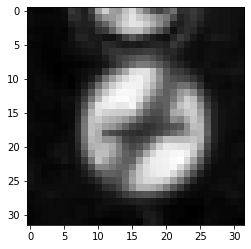

In [80]:
plt.imshow(color.rgb2gray(X_train[0]),cmap=plt.get_cmap('gray'))

In [0]:
X_train_gray = color.rgb2gray(X_train).reshape(-1,32,32,1)
X_test_gray = color.rgb2gray(X_test).reshape(-1,32,32,1)

In [86]:
model = get_cnn_v6((32,32,1),num_classes)
model_trained = train_model(model, X_train_gray,y_train,params_fit={})
predict(model_trained,X_test_gray,y_test)

Epoch 1/5
272/272 [==============================] - 5s 17ms/step - loss: 2.4910 - accuracy: 0.2961 - val_loss: 0.6234 - val_accuracy: 0.7917
Epoch 2/5
272/272 [==============================] - 4s 16ms/step - loss: 0.5187 - accuracy: 0.8318 - val_loss: 0.1233 - val_accuracy: 0.9615
Epoch 3/5
272/272 [==============================] - 4s 16ms/step - loss: 0.2361 - accuracy: 0.9256 - val_loss: 0.0581 - val_accuracy: 0.9832
Epoch 4/5
272/272 [==============================] - 4s 16ms/step - loss: 0.1636 - accuracy: 0.9486 - val_loss: 0.0351 - val_accuracy: 0.9894
Epoch 5/5
272/272 [==============================] - 4s 16ms/step - loss: 0.1268 - accuracy: 0.9597 - val_loss: 0.0274 - val_accuracy: 0.9919


0.9678004535147392

In [0]:
def preproc_img(img):
  hsv = color.rgb2hsv(img)
  hsv[:,:,2] = exposure.equalize_adapthist(hsv[:,:,2])
  img = color.hsv2rgb(hsv)

  return img

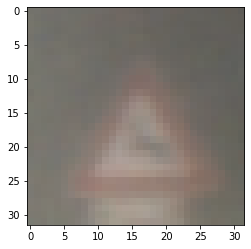

In [100]:
plt.imshow(X_train[400])

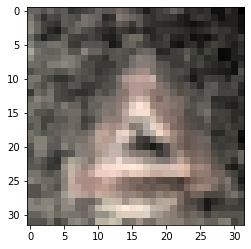

In [99]:
plt.imshow(preproc_img(X_train[400]))

In [0]:
X_train_prp = X_train.copy().astype(np.float32)
X_test_prp = X_test.copy().astype(np.float32)

for i in tqdm(range(X_train.shape[0])):
  X_train_prp[i] = preproc)img(X_train[i])
